In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from subprocess import call
from sklearn.metrics import mean_squared_error
import seaborn as sns; sns.set()


In [2]:
def ejecutar_rayo_cono(infile, outfile, width, step, step_other, out_time, infofile):
    comando = ['../../src/main', '-i', infile,
          '-o', outfile,
          '-d', '16',
          '-tipo-rayo', '2',
          '-width', str(width),
          '-step', str(step),
          '-step-other', str(step_other),
          '--time',
          '-out-time', out_time,
          '-v', '3',
          '-out-info', infofile]
    print(' '.join(comando))
    call(comando)

# /main -i ../dicom_csv2/1.2.826.0.1.3680043.2.656.1.138.10.csv -o asd.csv -d 16 -tipo-rayo 2 --width 50 -step 4 -step-other 3


def ejecutar_rayo_rand(infile, outfile, cant_rayos, out_time, infofile):
    comando = ['../../src/main', '-i', infile,
          '-o', outfile,
          '-d', '16',
          '-tipo-rayo', '1',
          '-rayos', str(cant_rayos),
          '--time',
          '-out-time', out_time,
          '-v', '3',
          '-out-info', infofile]
    print(' '.join(comando))
    call(comando)

In [27]:
# ejecutar_rayo_rand('../../dicom_csv2/1.2.826.0.1.3680043.2.656.1.138.18.csv', 'asd.csv', 6000, 'asdtime.csv')


../../src/main -i ../../dicom_csv2/1.2.826.0.1.3680043.2.656.1.138.18.csv -o asd.csv -d 16 -tipo-rayo 2 -width 50 -step 4 -step-other 4 --time -out-time asdtime.csv -v 3 -out-info info


In [49]:
def get_data_ejecucion(infile, outfile, out_time, infofile):
#     with open(out_time) as archivotiempo:
#         tiempo = float(archivotiempo.read().split(', ')[1])
#     with open(infofile) as archivoinfo:
#         cant_rayos = float(archivoinfo.read())
    
    original = np.genfromtxt(infile, delimiter=',').ravel()
    reconstructed = np.genfromtxt(outfile, delimiter=',').ravel()
    mse = mean_squared_error(original, reconstructed)
    return mse

In [51]:
imagenes = ['4000/{}.csv'.format(i) for i in range(1,12)]
for img in imagenes:
    print(get_data_ejecucion(entrada_reducida, img, '', ''))
       

13666.865234375
12402.6484375
9664.9501953125
14506.748046875
16176.11328125
24639.7685546875
22872.2236328125
19850.162109375
15899.025390625
20952.6865234375
17864.0224609375


In [10]:
entrada = '../../dicom_csv2/1.2.826.0.1.3680043.2.656.1.138.18.csv'
entrada_reducida = '../../imgchica.csv'

        
def ejecutarmediciones(lista):
    mediciones = []
    for elem in lista:
        width = elem[0]
        step= elem[1]
        step_out= elem[2]
        output = 'owidth1/output{}_{}_{}.csv'.format(width, step, step_out)
        timefile = 'owidth1/time{}_{}_{}.csv'.format(width, step, step_out)
        infofile = 'owidth1/info{}_{}_{}.csv'.format(width, step, step_out)
        print("Ejecutando con w {} s {} sout {}".format(width, step, step_out))
        ejecutar_rayo_cono(entrada, output, width, step, step_out, timefile, infofile)
        data = get_data_ejecucion(entrada_reducida, output, timefile, infofile)
        print(data)
        mediciones.append((width,step,step_out,data))
    return mediciones


In [9]:
def flatten_tuple(tupla):
    return (tupla[0],tupla[1],tupla[2],tupla[3][0],tupla[3][1],tupla[3][2])

In [42]:
listaelems = [(50,4,1), (25,1,1), (10,2,1)]
ejecutarmediciones(listaelems)

Ejecutando con w 50 s 4 sout 1
../../src/main -i ../../dicom_csv2/1.2.826.0.1.3680043.2.656.1.138.18.csv -o output50_4_1.csv -d 16 -tipo-rayo 2 -width 50 -step 4 -step-other 1 --time -out-time time50_4_1.csv -v 3 -out-info info50_4_1.csv


KeyboardInterrupt: 

In [39]:
datospost = pd.read_pickle('datospostaposta.pk')
datospost

,width,step,step-out,cantrayos,ecm
0,1,6,1,857.0,2275.716797
1,2,1,10,2041.0,2275.716797
2,1,2,2,2044.0,2275.716797
3,3,8,2,1017.0,2275.716797
4,5,22,1,993.0,2275.716797
5,5,12,2,1022.0,2275.716797
6,10,12,4,1019.0,2275.716797
7,20,12,8,844.0,2275.716797
8,1,6,1,1539.0,2275.716797
9,2,1,10,2039.0,2275.716797


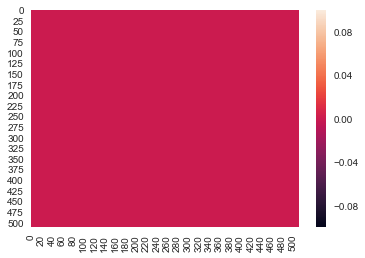

In [44]:
sns.heatmap(np.matrix([[0]*512] * 512))